In [1]:
# 1Ô∏è‚É£ ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Î®∏Ïã†Îü¨ÎãùÏö© ÎùºÏù¥Î∏åÎü¨Î¶¨
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [2]:
# 2Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", train.shape)
print("Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", test.shape)

Train Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (6818, 12)
Test Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1705, 11)


In [3]:

# 3Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏ ÌôïÏù∏
display(train.head())
display(train.info())
display(train.describe())
display(train.describe(include='O'))

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           NCR06       12.500          Low Fat         0.006760   
1           FDW11       12.600          Low Fat         0.048741   
2           FDH32       12.800          Low Fat         0.075997   
3           FDL52        6.635          Regular         0.046351   
4           FDO09       13.500          Regular         0.125170   

               Item_Type  Item_MRP Outlet_Identifier  \
0              Household   42.8112            OUT013   
1                 Breads   60.4194            OUT013   
2  Fruits and Vegetables   97.1410            OUT013   
3           Frozen Foods   37.4506            OUT017   
4            Snack Foods  261.4910            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1987        High               Tier 3   
1                       1987        High               Tier 3   
2                       1987        High               Tier 3   
3                       2007         NaN               Tier 2   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1           639.1680  
1  Supermarket Type1           990.7104  
2  Supermarket Type1          2799.6890  
3  Supermarket Type1          1176.4686  
4  Supermarket Type1          3418.8830

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


None

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  5656.000000      6818.000000  6818.000000                6818.000000   
mean     12.872703         0.066121   140.419533                1997.885890   
std       4.651034         0.051383    62.067861                   8.339795   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.785000         0.026914    93.610050                1987.000000   
50%      12.600000         0.053799   142.448300                1999.000000   
75%      17.000000         0.095273   185.060150                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        6818.000000  
mean         2190.941459  
std          1706.131256  
min            33.290000  
25%           836.577700  
50%          1806.648300  
75%          3115.944000  
max         13086.964800

Item_Identifier Item_Fat_Content    Item_Type Outlet_Identifier  \
count             6818             6818         6818              6818   
unique            1554                5           16                10   
top              FDW26          Low Fat  Snack Foods            OUT046   
freq                 9             4092          963               763   

       Outlet_Size Outlet_Location_Type        Outlet_Type  
count         4878                 6818               6818  
unique           3                    3                  4  
top         Medium               Tier 3  Supermarket Type1  
freq          2228                 2664               4474

In [4]:
# 4Ô∏è‚É£ Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("\ntrain Í≤∞Ï∏°Ïπò Ìï©Í≥Ñ:\n", train.isnull().sum())
print("\ntest Í≤∞Ï∏°Ïπò Ìï©Í≥Ñ:\n", test.isnull().sum())


train Í≤∞Ï∏°Ïπò Ìï©Í≥Ñ:
 Item_Identifier                 0
Item_Weight                  1162
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1940
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

test Í≤∞Ï∏°Ïπò Ìï©Í≥Ñ:
 Item_Identifier                0
Item_Weight                  301
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  470
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64


In [5]:
# 5Ô∏è‚É£ Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [6]:
# 6Ô∏è‚É£ Î≤îÏ£ºÌòï Í∞í Î∂ÑÌè¨
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_cols:
    print(f"\n[{col}] Í∞í Î∂ÑÌè¨:")
    print(train[col].value_counts())


[Item_Fat_Content] Í∞í Î∂ÑÌè¨:
Item_Fat_Content
Low Fat    4092
Regular    2287
LF          256
reg          96
low fat      87
Name: count, dtype: int64

[Item_Type] Í∞í Î∂ÑÌè¨:
Item_Type
Snack Foods              963
Fruits and Vegetables    960
Household                728
Frozen Foods             701
Dairy                    561
Baking Goods             522
Canned                   517
Health and Hygiene       416
Meat                     350
Soft Drinks              345
Breads                   190
Hard Drinks              171
Others                   137
Starchy Foods            115
Breakfast                 92
Seafood                   50
Name: count, dtype: int64

[Outlet_Size] Í∞í Î∂ÑÌè¨:
Outlet_Size
Medium    4168
Small     1925
High       725
Name: count, dtype: int64

[Outlet_Location_Type] Í∞í Î∂ÑÌè¨:
Outlet_Location_Type
Tier 3    2664
Tier 2    2249
Tier 1    1905
Name: count, dtype: int64

[Outlet_Type] Í∞í Î∂ÑÌè¨:
Outlet_Type
Supermarket Type1    4474
Grocery Store    

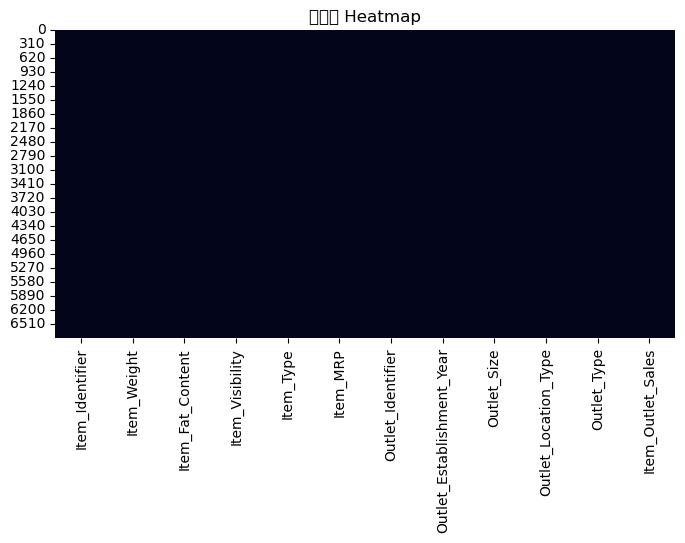

In [7]:
# 7Ô∏è‚É£ Í≤∞Ï∏° ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8,4))
sns.heatmap(train.isnull(), cbar=False)
plt.title("Í≤∞Ï∏°Ïπò Heatmap")
plt.show()

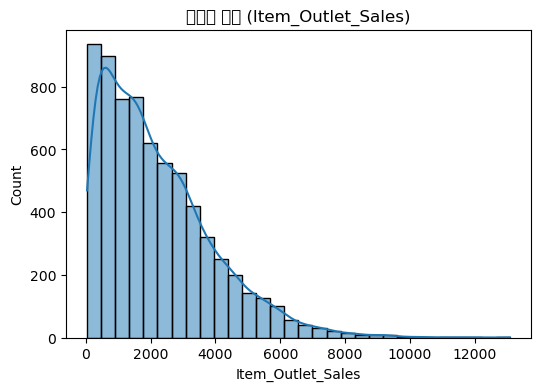

In [8]:
# 8Ô∏è‚É£ ÌåêÎß§Ïï° Î∂ÑÌè¨ ÌôïÏù∏
plt.figure(figsize=(6,4))
sns.histplot(train['Item_Outlet_Sales'], bins=30, kde=True)
plt.title("ÌåêÎß§Ïï° Î∂ÑÌè¨ (Item_Outlet_Sales)")
plt.show()

In [9]:
# 9Ô∏è‚É£ ÌÉÄÍπÉ Î∂ÑÎ¶¨
target = train.pop('Item_Outlet_Sales')

In [10]:
# 10Ô∏è‚É£ Label Encoding
cols = train.columns[train.dtypes == object]
for col in cols:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]], axis=0))
    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [11]:
# 11Ô∏è‚É£ Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
train.drop('Item_Identifier', axis=1, inplace=True)
test.drop('Item_Identifier', axis=1, inplace=True)

In [12]:
# 12Ô∏è‚É£ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=42
)
print("Train/Val ÌÅ¨Í∏∞:", X_train.shape, X_val.shape)

Train/Val ÌÅ¨Í∏∞: (5454, 10) (1364, 10)


In [19]:
# ÏÑ†ÌòïÌöåÍ∑Ä (OLS)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

In [15]:
# ÌèâÍ∞Ä
lr_mse = mean_squared_error(y_val, y_pred)
lr_mae = mean_absolute_error(y_val, y_pred)
lr_rmse = root_mean_squared_error(y_val, y_pred)
lr_r2 = r2_score(y_val, y_pred)

print("\nüîπ [Linear Regression ÌèâÍ∞ÄÍ≤∞Í≥º]")
print(f"MSE  : {lr_mse:.3f}")
print(f"MAE  : {lr_mae:.3f}")
print(f"RMSE : {lr_rmse:.3f}")
print(f"R¬≤   : {lr_r2:.3f}")


üîπ [Linear Regression ÌèâÍ∞ÄÍ≤∞Í≥º]
MSE  : 1422195.207
MAE  : 884.231
RMSE : 1192.558
R¬≤   : 0.524


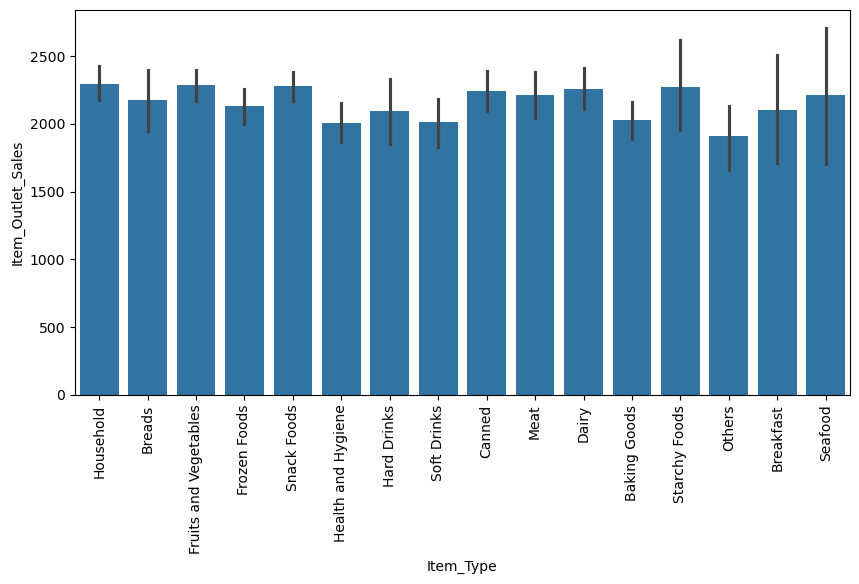

In [20]:
# Item_TypeÎ≥Ñ ÌèâÍ∑† ÌåêÎß§Ïï° ÏãúÍ∞ÅÌôî
# (Ïù∏ÏΩîÎî© Ï†Ñ ÏõêÎûò Ïù¥Î¶Ñ ÌôïÏù∏Ïö© - ÏõêÎûò Ïª¨Îüº Îî∞Î°ú Î∂àÎü¨Ïò§Í∏∞)
raw_train = pd.read_csv('train.csv')

plt.figure(figsize=(10,5))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=raw_train, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("")
plt.show()

In [13]:
# ÏÑ†ÌòïÌöåÍ∑Ä (OLS)
# LinearRegressionÏùÑ ÏÇ¨Ïö©Ìï¥ Ï¢ÖÏÜçÎ≥ÄÏàò(Item_Outlet_Sales)Î•º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§Î°ú ÏòàÏ∏°
lr = LinearRegression()           # ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ±
lr.fit(X_train, y_train)          # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ ÌïôÏäµ
y_pred = lr.predict(X_val)        # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞(X_val)Î°ú ÌåêÎß§Ïï° ÏòàÏ∏°

# ÌèâÍ∞Ä
# ÏòàÏ∏° Í≤∞Í≥º(y_pred)ÏôÄ Ïã§Ï†ú Í∞í(y_val)ÏùÑ ÎπÑÍµêÌïòÏó¨ ÏÑ±Îä• ÌèâÍ∞Ä
lr_mse = mean_squared_error(y_val, y_pred)  # ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) - Ïò§Ï∞® Ï†úÍ≥± ÌèâÍ∑†
lr_mae = mean_absolute_error(y_val, y_pred) # ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) - Ïò§Ï∞® Ï†àÎåìÍ∞í ÌèâÍ∑†
lr_rmse = root_mean_squared_error(y_val, y_pred) # RMSE - MSEÏóê Î£®Ìä∏ ÏîåÏö¥ Í∞í, Îã®ÏúÑ ÎèôÏùº
lr_r2 = r2_score(y_val, y_pred)             # Í≤∞Ï†ïÍ≥ÑÏàò(R¬≤) - ÏòàÏ∏° ÏÑ§Î™ÖÎ†• ÏßÄÌëú

# ÌèâÍ∞Ä Í≤∞Í≥º Ï∂úÎ†•
print("\nüîπ [Linear Regression ÌèâÍ∞ÄÍ≤∞Í≥º]")
print(f"MSE  : {lr_mse:.3f}")   # Ïò§Ï∞®Í∞Ä ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå
print(f"MAE  : {lr_mae:.3f}")   # Ïò§Ï∞®Í∞Ä ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå
print(f"RMSE : {lr_rmse:.3f}")  # Ïò§Ï∞®Í∞Ä ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå
print(f"R¬≤   : {lr_r2:.3f}")    # 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏ ÏÑ§Î™ÖÎ†•Ïù¥ Ï¢ãÏùå




üîπ [Linear Regression ÌèâÍ∞ÄÍ≤∞Í≥º]
MSE  : 1422195.207
MAE  : 884.231
RMSE : 1192.558
R¬≤   : 0.524


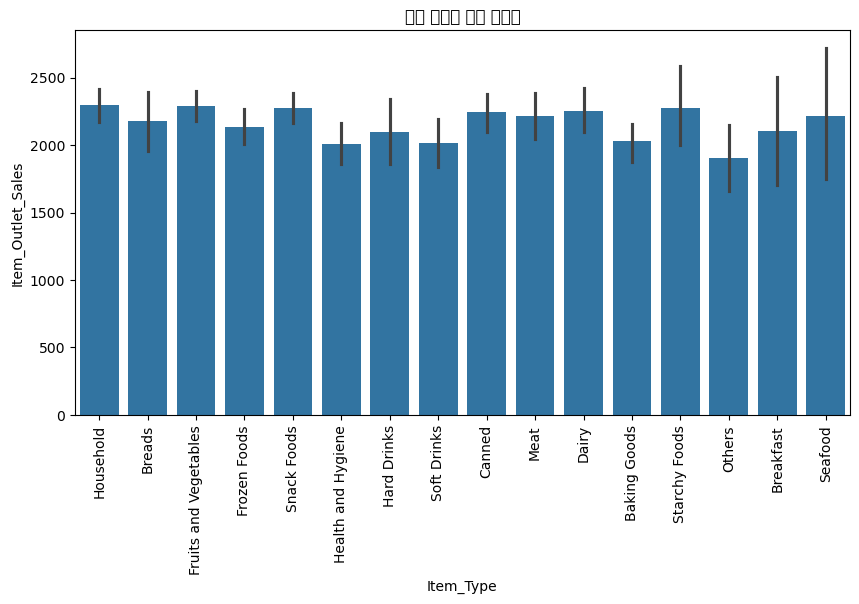

In [14]:
# Item_TypeÎ≥Ñ ÌèâÍ∑† ÌåêÎß§Ïï° ÏãúÍ∞ÅÌôî
# 'Item_Type'Î≥Ñ ÌåêÎß§Ïï° ÌèâÍ∑†ÏùÑ ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
# ÏõêÎûò Ïù¥Î¶ÑÏùÑ Î≥¥Í∏∞ ÏúÑÌï¥ Ïù∏ÏΩîÎî© Ï†Ñ Îç∞Ïù¥ÌÑ∞(raw_train) ÏÇ¨Ïö©
raw_train = pd.read_csv('train.csv')  

plt.figure(figsize=(10,5))  # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ ÏÑ§Ï†ï
sns.barplot(
    x='Item_Type',           # xÏ∂ï: ÏÉÅÌíà Ï¢ÖÎ•ò
    y='Item_Outlet_Sales',   # yÏ∂ï: ÌåêÎß§Ïï°
    data=raw_train,          # Îç∞Ïù¥ÌÑ∞
    estimator=np.mean        # Í∞Å ÏÉÅÌíà Ï¢ÖÎ•òÏùò ÌèâÍ∑† ÌåêÎß§Ïï° Í≥ÑÏÇ∞
)
plt.xticks(rotation=90)      # xÏ∂ï Í∏ÄÏûêÎ•º 90ÎèÑ ÌöåÏ†Ñ (Í≤πÏπòÏßÄ ÏïäÍ≤å)
plt.title("ÏÉÅÌíà Ï¢ÖÎ•òÎ≥Ñ ÌèâÍ∑† ÌåêÎß§Ïï°")  # Í∑∏ÎûòÌîÑ Ï†úÎ™©
plt.show()                  # Í∑∏ÎûòÌîÑ Ï∂úÎ†•

In [10]:
# 11Ô∏è‚É£ ÌèâÍ∞Ä (MSE, MAE, RMSE, R2)
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("\n[Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä]")
print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 : {r2:.4f}")


[Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä]
MSE : 1258220.34
MAE : 858.96
RMSE : 1121.70
R2 : 0.5153


/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


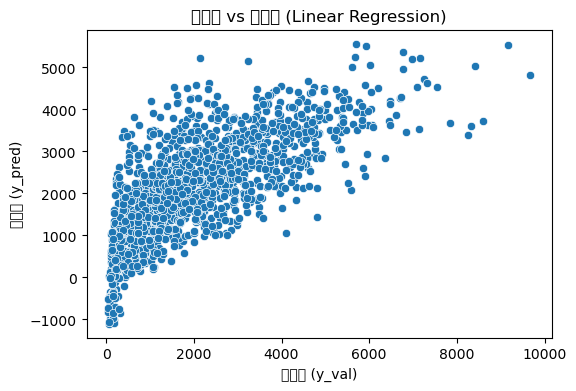

In [11]:
# 12Ô∏è‚É£ ÏãúÍ∞ÅÌôî (Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í)
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_val, y=y_pred)
plt.xlabel("Ïã§Ï†úÍ∞í (y_val)")
plt.ylabel("ÏòàÏ∏°Í∞í (y_pred)")
plt.title("Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í (Linear Regression)")
plt.show()

In [1]:
import pandas as pd
import statsmodels.api as sm

train = pd.read_csv('train.csv')

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÎòêÎäî Ï±ÑÏö∞Í∏∞
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y)
X = pd.get_dummies(train['Item_Type'], drop_first=True)  # Î≤îÏ£ºÌòï Î≥ÄÏàò ÎçîÎØ∏Ìôî
y = train['Item_Outlet_Sales']

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X)

# OLS ÌöåÍ∑ÄÎ∂ÑÏÑù
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (/opt/conda/lib/python3.11/site-packages/scipy/_lib/_util.py)

In [ ]:
# Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÎòêÎäî Ï±ÑÏö∞Í∏∞
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [ ]:
# ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y)
X = pd.get_dummies(train['Item_Type'], drop_first=True)  # Î≤îÏ£ºÌòï Î≥ÄÏàò ÎçîÎØ∏Ìôî
y = train['Item_Outlet_Sales']

In [ ]:
# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(X)

In [ ]:
# OLS ÌöåÍ∑ÄÎ∂ÑÏÑù
model = sm.OLS(y, X).fit()

In [2]:
# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())

NameError: name 'model' is not defined

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.xticks(rotation=90)
plt.title('Item_Type vs Item_Outlet_Sales')
plt.show()


NameError: name 'train' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
avg_sales = train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=avg_sales.index, y=avg_sales.values)
plt.xticks(rotation=90)
plt.ylabel('Average Item_Outlet_Sales')
plt.title('Average Sales by Item_Type')
plt.show()
